In [1]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 41.4 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=aa8a277445ae584cb5f802028fbb5471a5e2097478649c62ae5d1296866e19da
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [2]:
# import Python packages
import pandas as pd
import numpy as np
from google.colab import files
from sklearn import preprocessing
import matplotlib.pyplot as plt

# regression package
import statsmodels.api as sm

# factor analysis packages
import factor_analyzer
# you could also use sklearn to run PCA

#functions used to preprocess the data
from sklearn import preprocessing

# Functions used for Hierarchical Clustering
from scipy.cluster import hierarchy

# clustering packages
from sklearn import cluster
from sklearn.cluster import KMeans
# k_means() is a wrapper that returns the result of KMeans.fit()
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# read in the Ford Ka data
uploaded = files.upload()
exl = pd.ExcelFile('Ford Ka Data.xlsx')

# take a look at the Ford Ka data
fordka=pd.read_excel(exl,"Psychographic Data")
dem = pd.read_excel(exl, "Demographic Data")

Saving Ford Ka Data (1).xlsx to Ford Ka Data (1) (1).xlsx


## Question 4:

In [ ]:
#Cross Tabulation
import seaborn as sns
# Functions used for chi-squared test
from scipy.stats import chi2_contingency

# Load the main data
#data_df = pd.read_excel("/mnt/data/Ford_Ka_Data.xlsx", skiprows=5)
data_df = pd.read_excel('Ford Ka Data.xlsx', skiprows = 5)
data_df.columns = data_df.iloc[0]
data_df = data_df.drop(0)

# Cross-tabulations for demographic variables against preference groups
cross_tab_gender = pd.crosstab(data_df["Preference Group"], data_df["Gender"])
cross_tab_age_category = pd.crosstab(data_df["Preference Group"], data_df["Age Category"])
cross_tab_marital_status = pd.crosstab(data_df["Preference Group"], data_df["Marital Status"])
cross_tab_num_children = pd.crosstab(data_df["Preference Group"], data_df["Number of Children"])
cross_tab_first_purchase = pd.crosstab(data_df["Preference Group"], data_df["1st Time Purchase"])
cross_tab_income_category = pd.crosstab(data_df["Preference Group"], data_df["Income Category"], colnames = ['Preference'], rownames = ['income category'])

cross_tab_first_purchase



1st Time Purchase,1,2
Preference Group,,
1,13,103
2,8,64
3,16,46


Chi-Squared Test

In [ ]:
#Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(cross_tab_income_category.values[:,:])
chi2, p, dof

(6.148035009510128, 0.8026763612456902, 10)

In [ ]:
chi2, p, dof, expected = chi2_contingency(cross_tab_num_children.values[:,:])
chi2, p, dof

(8.694600900238212, 0.3687103686742468, 8)

In [ ]:
chi2, p, dof, expected = chi2_contingency(cross_tab_gender.values[:,:])
chi2, p, dof

(5.386148427027181, 0.06767257930639109, 2)

In [ ]:
chi2, p, dof, expected = chi2_contingency(cross_tab_age_category.values[:,:])
chi2, p, dof

(16.570665451700865, 0.08442047770231506, 10)

In [ ]:
chi2, p, dof, expected = chi2_contingency(cross_tab_marital_status.values[:,:])
chi2, p, dof

(5.209284449551529, 0.26648969524245725, 4)

In [ ]:
chi2, p, dof, expected = chi2_contingency(cross_tab_first_purchase.values[:,:])
chi2, p, dof

(7.921089476886998, 0.019052732708284666, 2)

## Question 5a



In [ ]:
# drop the first 5 rows because we want to scale the data later.
df = fordka.drop(range(6))
df

,Psychographic Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
6,1,6,2,4,3,1,5,5,3,4,...,2,4,5,4,5,3,4,4,4,2
7,2,7,7,7,5,4,4,5,4,5,...,1,1,1,1,5,4,3,5,4,5
8,3,5,4,6,5,7,5,3,5,4,...,3,5,6,3,4,4,5,3,4,4
9,4,4,2,5,4,2,4,5,4,3,...,3,5,4,4,4,2,5,5,5,3
10,5,5,5,7,6,7,3,4,5,4,...,6,4,5,5,4,5,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,246,6,7,5,5,3,4,3,3,4,...,2,2,1,1,3,5,2,3,4,5
252,247,4,3,6,7,6,4,3,3,3,...,4,2,4,4,5,2,5,4,4,4
253,248,6,5,3,1,4,4,5,3,4,...,6,3,5,4,7,6,6,1,2,2
254,249,3,3,6,7,6,4,5,3,3,...,2,4,4,3,3,5,4,5,5,3


In [ ]:
#The "Psychographic Data" column is the respondent number in the survey!
df.rename(columns = {'Psychographic Data':'Respondent Number'}, inplace = True)
df

,Respondent Number,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
6,1,6,2,4,3,1,5,5,3,4,...,2,4,5,4,5,3,4,4,4,2
7,2,7,7,7,5,4,4,5,4,5,...,1,1,1,1,5,4,3,5,4,5
8,3,5,4,6,5,7,5,3,5,4,...,3,5,6,3,4,4,5,3,4,4
9,4,4,2,5,4,2,4,5,4,3,...,3,5,4,4,4,2,5,5,5,3
10,5,5,5,7,6,7,3,4,5,4,...,6,4,5,5,4,5,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,246,6,7,5,5,3,4,3,3,4,...,2,2,1,1,3,5,2,3,4,5
252,247,4,3,6,7,6,4,3,3,3,...,4,2,4,4,5,2,5,4,4,4
253,248,6,5,3,1,4,4,5,3,4,...,6,3,5,4,7,6,6,1,2,2
254,249,3,3,6,7,6,4,5,3,3,...,2,4,4,3,3,5,4,5,5,3


In [ ]:
#drop the first five rows to clean the data.
dem_clean = dem.drop(range(5))

# we need a variable that's similar to the "z_activity" column in the file "B9651_FactorAnalysis_Fall2023_Sep19".
# It looks like the "Preference Group" column in Ford's Demographic Data might be a good choice since it captures
# the diferent degrees of preferences, which is similar to how z_activity captures the "activeness" of each person at the bank.

#locate the column
preference_group = dem_clean.iloc[:, 1]

#add column to the df_sc dataframe which has standardized psychographic data.
df.insert(1, "Preference Group", preference_group, True)


In [ ]:
survqs=df.iloc[:,1:64]
survqs.head(5)

,Preference Group,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
6,1,6,2,4,3,1,5,5,3,4,...,2,4,5,4,5,3,4,4,4,2
7,3,7,7,7,5,4,4,5,4,5,...,1,1,1,1,5,4,3,5,4,5
8,2,5,4,6,5,7,5,3,5,4,...,3,5,6,3,4,4,5,3,4,4
9,3,4,2,5,4,2,4,5,4,3,...,3,5,4,4,4,2,5,5,5,3
10,1,5,5,7,6,7,3,4,5,4,...,6,4,5,5,4,5,4,3,4,5


In [ ]:
# scale the data
survqs_sc = pd.DataFrame(preprocessing.scale(survqs),columns=survqs.columns)

In [ ]:
# some functions to format PCA results
def get_loadings_communalities(pca,round_dig=2,index_names=None):
  '''Returns a DataFrame containings the loadings'''
  df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
  if pca.rotation:
    df['communalities']=pca.get_communalities()
  df=df.round(3)
  return  df

def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squared Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

In [ ]:
survqs.shape
# survqs.shape[0] = 250
# survqs.shape[1] = 62

(250, 63)

In [ ]:
fordka_pca = factor_analyzer.FactorAnalyzer(n_factors=survqs.shape[1],
                                          rotation=None,
                                          method='principal').fit(survqs)

In [ ]:
get_summary(fordka_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63
Sum of Squared Loadings,16.62,10.79,5.79,1.47,1.33,1.23,1.20,1.16,1.11,0.99,...,0.16,0.15,0.15,0.13,0.12,0.12,0.1,0.09,0.08,0.07
Proportion of Variance Explained,0.26,0.17,0.09,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Cumulative Proportion,0.26,0.44,0.53,0.55,0.57,0.59,0.61,0.63,0.65,0.66,...,0.98,0.99,0.99,0.99,0.99,0.99,1.0,1.00,1.00,1.00


Text(0, 0.5, 'Variance')

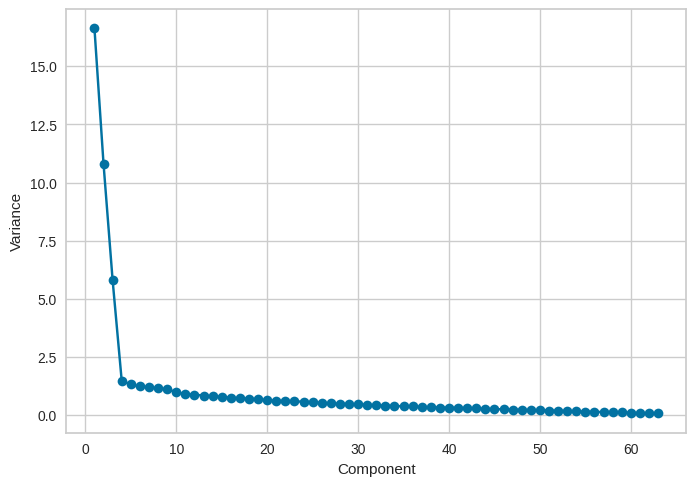

In [ ]:
# scree plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(fordka_pca.get_factor_variance()[0])),
         fordka_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

In [ ]:
#elbow at 4, 4-1=3
fordka_pca_rotated = factor_analyzer.FactorAnalyzer(n_factors=3,
                                          rotation='varimax',
                                          method='principal').fit(survqs)

In [ ]:
get_loadings_communalities(fordka_pca_rotated,index_names=list(survqs.columns))

,RC1,RC2,RC3,communalities
Preference Group,0.118,-0.110,-0.026,0.027
Unnamed: 1,0.630,-0.319,0.412,0.668
Unnamed: 2,0.910,0.025,0.077,0.834
Unnamed: 3,-0.120,0.687,-0.104,0.497
Unnamed: 4,0.008,0.640,-0.546,0.708
...,...,...,...,...
Unnamed: 58,-0.091,-0.111,0.661,0.458
Unnamed: 59,-0.085,-0.222,0.634,0.458
Unnamed: 60,0.095,0.048,-0.688,0.484
Unnamed: 61,0.263,0.117,-0.674,0.537


## Question 5b: Cluster Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

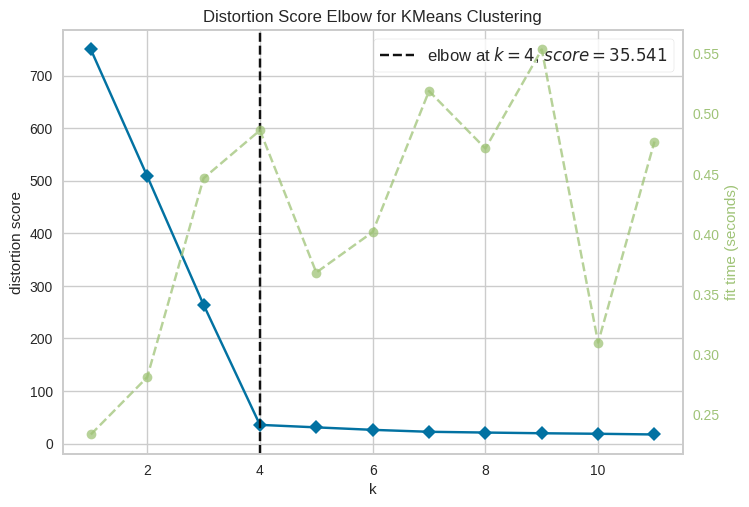

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
fordka_scores = pd.DataFrame(fordka_pca_rotated.transform(survqs),
      columns=[f'RC{i}' for i in range(1,1+fordka_pca_rotated.loadings_.shape[1])])
model = KMeans(random_state=1690)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(fordka_scores)
visualizer.show()

In [ ]:
#ratio plot
ratio = []
_, _, total_sum_squares = cluster.k_means(survqs_sc,n_clusters=1)

for i in range(11):
  _, _, inertia_i = cluster.k_means(survqs_sc,n_clusters=i+1)
  ratio.append(1-(inertia_i/total_sum_squares))
  print(inertia_i)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15750.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11736.98957550573


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9104.599116356047


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7747.047674525235


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7635.918526391895


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7544.700698628988


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7429.611795021961


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7380.154156661276


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7285.792089595776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7212.758662626857


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7146.107727575003


In [ ]:
ratio = pd.DataFrame(ratio)
ratio = ratio.reset_index()
ratio['index'] = ratio['index'] + 1
ratio.columns = ['Number of Clusters','Ratio']
ratio

,Number of Clusters,Ratio
0,1,0.000000
1,2,0.254794
2,3,0.421930
3,4,0.508124
4,5,0.515180
5,6,0.520971
6,7,0.528279
7,8,0.531419
8,9,0.537410
9,10,0.542047


Text(0.5, 1.0, 'Ratio Plot')

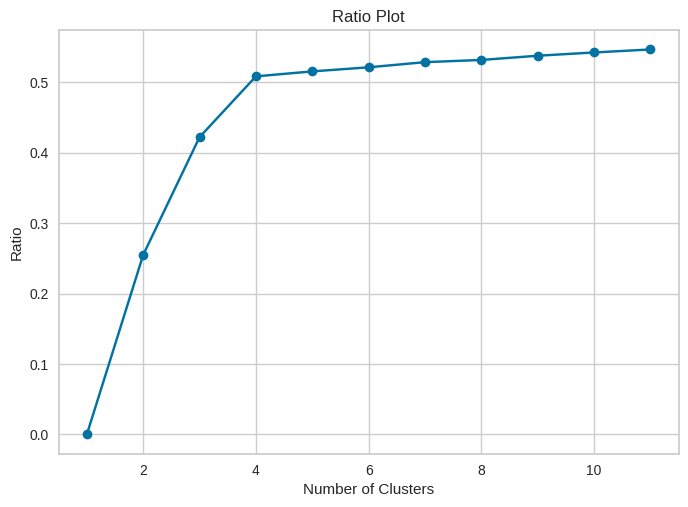

In [ ]:
plt.plot(ratio['Number of Clusters'],ratio['Ratio'],marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Ratio')
plt.title('Ratio Plot')

--> Elbow plot suggests 4 clusters.

K-Means cluster analysis:

In [ ]:
def check_clusters(data,labels):
  print(list(zip(*np.unique(labels,return_counts=True))))

  return pd.pivot_table(data,index=labels)

Trial with 5 clusters:

In [ ]:
get_loadings_communalities(fordka_pca_rotated,index_names=list(survqs.columns))
centroids, labels, inertia = cluster.k_means(pd.DataFrame(fordka_scores),n_clusters=5,random_state=1690)
check_clusters(fordka_scores,labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(0, 65), (1, 36), (2, 78), (3, 32), (4, 39)]


,RC1,RC2,RC3
0,-0.203918,1.642812,-0.063411
1,-1.020116,-0.829933,-0.475344
2,1.384889,-0.429170,-0.239391
3,-0.470934,-0.525608,2.406290
4,-1.101862,-0.682319,-0.951147


Trial with 3 clusters:

In [ ]:
#Trial with 3 clusters.
centroids, labels, inertia = cluster.k_means(pd.DataFrame(fordka_scores),n_clusters=3,random_state=1690)
check_clusters(fordka_scores,labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(0, 65), (1, 107), (2, 78)]


,RC1,RC2,RC3
0,-0.203918,1.642812,-0.063411
1,-0.885670,-0.685117,0.213030
2,1.384889,-0.429170,-0.239391


Trial with 2 clusters:

In [ ]:
#Trial with 2 clusters.
centroids, labels, inertia = cluster.k_means(pd.DataFrame(fordka_scores),n_clusters=2,random_state=1690)
check_clusters(fordka_scores,labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(0, 65), (1, 185)]


,RC1,RC2,RC3
0,-0.203918,1.642812,-0.063411
1,0.071647,-0.577204,0.022279


Trial with 4 clusters:

In [ ]:
centroids, labels, inertia = cluster.k_means(pd.DataFrame(fordka_scores),n_clusters=4,random_state=1690)
check_clusters(fordka_scores,labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(0, 65), (1, 75), (2, 78), (3, 32)]


,RC1,RC2,RC3
0,-0.203918,1.642812,-0.063411
1,-1.062624,-0.753174,-0.722761
2,1.384889,-0.429170,-0.239391
3,-0.470934,-0.525608,2.406290


## Question 6

In [ ]:
#Check the labels associated with the three clusters (RC1, RC2, RC3).
#This "labels" variable comes from K-Means part:
#centroids, labels, inertia = cluster.k_means(pd.DataFrame(fordka_scores),n_clusters=3,random_state=1690)

labels

#The labels are {0,1,2}. To make it consitent with the RC labels, we add 1 to each element so the labels are {1,2,3} which are the same with the RC labels.
Segment_labels = labels + 1

In [ ]:
Segment_labels

array([2, 3, 1, 2, 1, 3, 3, 3, 4, 2, 3, 1, 4, 2, 3, 2, 3, 2, 3, 4, 1, 1,
       3, 1, 1, 4, 1, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 2, 3, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 4, 1, 1, 4, 4, 2, 1, 3, 1, 2, 2, 3, 2, 4, 1,
       3, 3, 2, 3, 3, 2, 4, 1, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 1, 3, 2, 3,
       4, 1, 2, 4, 1, 2, 1, 3, 2, 2, 3, 4, 1, 1, 1, 3, 4, 3, 2, 1, 3, 3,
       1, 4, 2, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 1, 4, 1, 2, 3, 2, 1, 1, 4,
       3, 4, 2, 3, 1, 2, 1, 2, 2, 3, 2, 2, 4, 1, 4, 3, 3, 3, 3, 2, 3, 3,
       3, 4, 3, 3, 2, 2, 2, 1, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 1, 3,
       2, 2, 1, 1, 4, 2, 1, 4, 1, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 1, 4, 2,
       2, 2, 1, 2, 1, 4, 2, 1, 2, 2, 4, 3, 2, 3, 4, 2, 2, 1, 3, 2, 2, 3,
       1, 3, 1, 3, 3, 3, 3, 4, 2, 2, 2, 2, 4, 2, 1, 2, 2, 3, 3, 4, 2, 3,
       1, 2, 3, 3, 1, 4, 1, 3], dtype=int32)

In [ ]:
#Cross Tabulation
import seaborn as sns

# Load the main data
#data_df = pd.read_excel("/mnt/data/Ford_Ka_Data.xlsx", skiprows=5)
data_df = pd.read_excel('Ford Ka Data.xlsx', skiprows = 5)
data_df.columns = data_df.iloc[0]
data_df = data_df.drop(0)

In [ ]:
#update the df table to include the RC group assigned to each respondent.

data_df.insert(2, "Segment", Segment_labels, True)
data_df

,Respondent Number,Preference Group,Segment,Gender,Age,Marital Status,Number of Children,1st Time Purchase,Age Category,Children Category,Income Category
1,1,1,2,2,44,3,0,2,5,0,6
2,2,3,3,1,24,2,1,1,1,1,3
3,3,2,1,2,34,3,1,2,3,1,1
4,4,3,2,1,44,3,0,2,5,0,3
5,5,1,1,2,41,1,2,1,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...
246,246,1,3,1,52,1,0,2,6,0,5
247,247,1,1,2,42,1,0,2,5,0,2
248,248,1,4,1,34,2,0,2,3,0,4
249,249,2,1,2,34,3,0,2,3,0,6


In [ ]:
# Cross-tabulations for demographic variables against RC Group
cross_tab_gender = pd.crosstab(data_df["Segment"], data_df["Gender"])
cross_tab_age_category = pd.crosstab(data_df["Segment"], data_df["Age Category"])
cross_tab_marital_status = pd.crosstab(data_df["Segment"], data_df["Marital Status"])
cross_tab_num_children = pd.crosstab(data_df["Segment"], data_df["Number of Children"])
cross_tab_first_purchase = pd.crosstab(data_df["Segment"], data_df["1st Time Purchase"])
cross_tab_income_category = pd.crosstab(data_df["Segment"], data_df["Income Category"])


In [ ]:
# Results:
print(cross_tab_gender)
print(cross_tab_age_category)
print(cross_tab_marital_status)
print(cross_tab_num_children)
print(cross_tab_first_purchase)
print(cross_tab_income_category)

Gender    1   2
Segment        
1        25  40
2        43  32
3        46  32
4        16  16
Age Category  1   2   3   4   5   6
Segment                            
1             6   8  14   3  22  12
2             8  13  18  10  15  11
3             6  15  11  14  16  16
4             4   7   4   4  10   3
Marital Status   1   2   3
Segment                   
1               33   6  26
2               35  11  29
3               42   8  28
4               17   3  12
Number of Children   0   1   2  3  4
Segment                             
1                   38   8  12  6  1
2                   47  14   6  6  2
3                   47  18   8  5  0
4                   16   8   5  3  0
1st Time Purchase   1   2
Segment                  
1                   9  56
2                  14  61
3                  10  68
4                   4  28
Income Category  1   2   3   4   5   6
Segment                               
1                7  15  16  12  10   5
2                6   9  14  13 